In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
 !pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00:00:0100:01
  Attempting unins

In [3]:
from diffusers import DiffusionPipeline  # Import the DiffusionPipeline class from the diffusers library
import torch  # Import the torch library for tensor operations

# Initialize the base pipeline
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",  # Specify the model checkpoint to load for the base pipeline
    torch_dtype=torch.float16,  # Set the data type for tensors to float16, which is half-precision floating point
    use_safetensors=True,  # Enable safe tensors, which is typically used for numerical stability (Safe tensors are designed to improve numerical stability during model operations. By using safe tensors, the model can potentially reduce the risk of numerical errors and improve the overall robustness of the computations.)
    variant="fp16"  # Specify the variant as fp16, indicating the model is optimized for float16 operations (The variant parameter is set to "fp16", indicating that the model is optimized for operations using float16 precision. Float16, also known as half-precision, reduces the memory footprint and computational load compared to full precision (float32). This variant is particularly useful for leveraging hardware accelerators like GPUs that perform well with half-precision arithmetic, leading to faster computation and reduced memory usage.)
)

pipe.to("cuda")  # Move the pipeline to GPU (CUDA) for faster computation if CUDA is available

2025-07-13 10:47:07.485636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752403627.677338      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752403627.732588      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
# Sample text input
prompt = "A vibrant sunset over the city skyline with silhouetted buildings."

In [5]:
# Negative prompt (optional)
negative_prompt = "Avoid including any water elements in the scene."


In [6]:
# Generate image from text
images = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

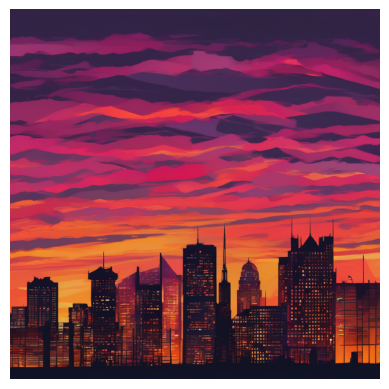

In [7]:
import matplotlib.pyplot as plt

# Display the image using matplotlib
plt.imshow(images)
plt.axis('off')
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

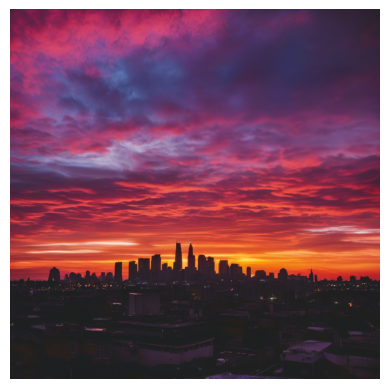

In [8]:
def generate_image(prompt, negative_prompt):
    # Generate image using the base pipeline
    images = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]
    
    # Display the image using matplotlib
    plt.imshow(images)
    plt.axis('off')
    plt.show()

# Example usage
prompt = "A vibrant sunset over the city skyline with silhouetted buildings."
negative_prompt = "Avoid including any water elements in the scene."
generate_image(prompt, negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

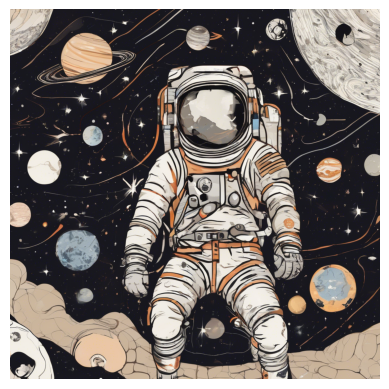

In [9]:
# Example usage
prompt = "A spaceman floating in the galaxy with stars and planets around."
negative_prompt = "Avoid including any alien creatures in the scene."
generate_image(prompt, negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

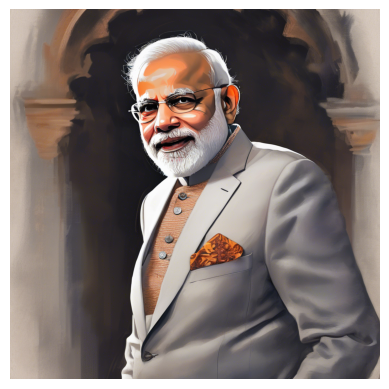

In [11]:
# Example usage
prompt = "A portrait of the Prime Minister of India, Narendra Modi, in a formal suit."
negative_prompt = "Avoid including any other people in the scene."
generate_image(prompt, negative_prompt)